In [1]:
import pandorasat as ps
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
plt.style.use('seaborn-white')

In [2]:
nirda = ps.PandoraSat.NIRDA
visda = ps.PandoraSat.VISDA

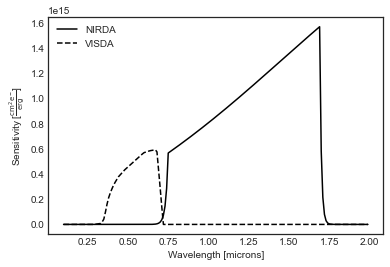

In [3]:
w = np.arange(0.1, 2, 0.01) * u.micron
fig, ax = plt.subplots()
ax.plot(w, nirda.sensitivity(w), label='NIRDA', c='k', ls='-')
ax.plot(w, visda.sensitivity(w), label='VISDA', c='k', ls='--')
ax.set(xlabel='Wavelength [microns]', ylabel=f"Sensitivity [{nirda.sensitivity(w).unit.to_string('latex')}]")
plt.legend()

In [4]:
target = ps.Target('GJ 436').from_vizier()

In [5]:
# If we wanted to, we would implement this:
# target = ps.Target('GJ 436').from_phoenix()

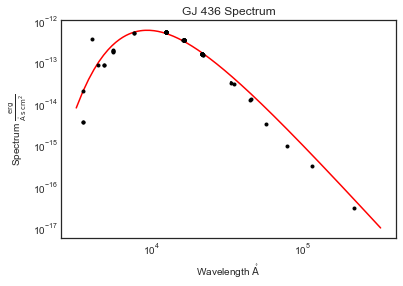

In [6]:
target.plot_spectrum();

In [7]:
trace = nirda.get_trace(target)

100%|█████████████████████████████████████████| 600/600 [00:09<00:00, 60.52it/s]


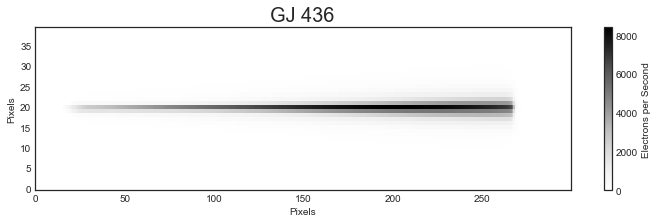

In [10]:
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(12, 3))
    plt.pcolormesh(np.arange(trace.shape[1]), np.arange(trace.shape[0]), trace.value)
    cbar = plt.colorbar()
    cbar.set_label("Electrons per Second")
    plt.title('GJ 436', fontsize=20)
    ax.set(xlabel='Pixels', ylabel='Pixels')